In [3]:
from sklearn import datasets
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt


In [4]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import copy
from time import sleep
import random

In [65]:
def kernel_svm(X,Y,K,max_iterations = 1000):
    X_count = X.shape[0]
    alpha = np.zeros(X_count)
    alphas_history = [alpha]
            
    for ite in range(max_iterations):
#         print('iter',ite)
        for i in range(X.shape[0]):
            sum = 0
            val = 0
            for j in range(X.shape[0]):
                val= alpha[j] * Y[j] * K[i,j]#rbf(X[i],X[j])
                sum = sum + val
            if sum <= 0:
                val = -1
            elif sum >0:
                val = 1
            if val != Y[i]:
                alpha[i] = alpha[i] + 1 # 为什么是加1？？？？
        alphas_history.append(alpha)
    return alpha,alphas_history
def kernel_predict(train_X,train_Y,test_X,alpha,test_Y=None):
    right = 0
    y_pred = []
    for i in range(len(test_X)):
        s = 0
        for a, x_train,y_train  in zip(alpha, train_X,train_Y):
            s += a * y_train * rbf(test_X[i],x_train)
        if s >=0:
            s = 1
        elif s <0:
            s = -1
        y_pred.append(s)
    return y_pred
#     print " Correct : ",right," Accuracy : ",right*100/test_X.shape[0]

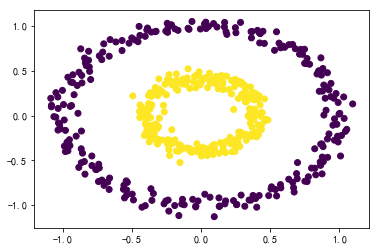

In [6]:
def genTwoCircles(n_samples=1000):
    X,y = datasets.make_circles(n_samples, factor=0.4, noise=0.05)
    return X, y
X,y = genTwoCircles(n_samples=500)
plt.scatter(X[:,0], X[:,1],c=y)
plt.show()
y[y==0] = -1

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
standardScaler = StandardScaler()
standardScaler.fit(X)
X_standerd = standardScaler.transform(X)
X =X_standerd

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)

w [[0.19782211]
 [0.01475518]]


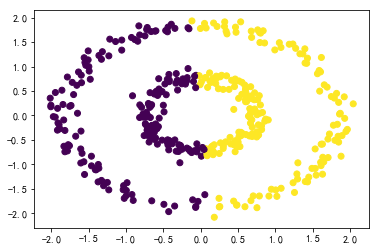

In [7]:
w = SVM(X_train,y_train,max_iter=1000)
print('w',w)
y_pre = np.array(prediction(X_train,w))
plt.scatter(X_train[:,0], X_train[:,1],c=y_pre)


In [86]:
def rbf(va, vb,gamma = 0.7):
    return np.exp(-gamma * np.linalg.norm(va - vb) ** 2)
# Gram matrix
K = np.zeros((len(X_train),len(X_train)))
for i in range(len(X_train)):
    for j in range(i,len(X_train)):
        K[i,j] = rbf(X[i], X[j],gamma=0.22)
        if i!=j:
            K[j,i] = K[i,j]

0.94


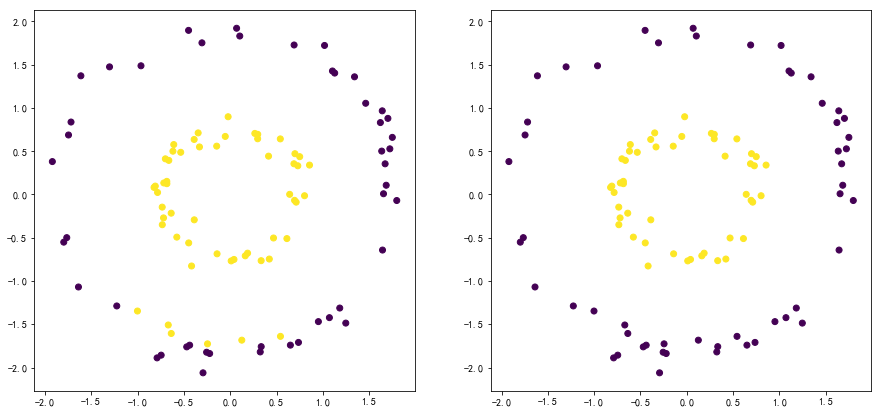

In [87]:
alpha,alphas_history = kernel_svm(X_train,y_train,K,max_iterations=10)
y_pre = np.array(kernel_predict(X_train, y_train, X_test,alpha))

fig,axes = plt.subplots(1,2,figsize=(15,7))
fig.subplots_adjust(hspace=0.3,wspace=0.2)

axes[0].scatter(X_test[:,0], X_test[:,1],c=y_pre)

axes[1].scatter(X_test[:,0], X_test[:,1],c=y_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pre,y_test))

In [48]:
np.exp(np.linalg.norm(np.array([0,0]) - np.array([0,0])) ** 2)

1.0